In [2]:
import time
import os
import cv2
import matplotlib.pyplot as plt
from lib.utilities import *
import numpy as np
import pandas as pd

In [4]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"

plt.rcParams.update({'font.size': 16})
#plt.rcParams['figure.figsize'] = [20, 12]

NameError: name 'stim_site' is not defined

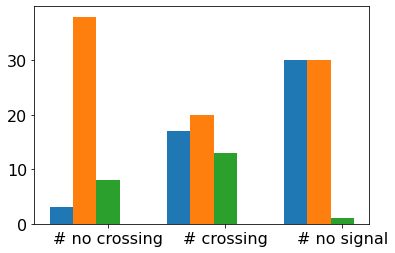

In [7]:
# Results 2/8/23 - 6/9/23
# in format # no crossing, # crossing, # no signal
crossing_data = {
    "L2/3": [3, 17, 30],
    "L4": [38, 20, 30],
    "L5": [8, 13, 1]
}

labels = [x for x in crossing_data.keys()]

# plot this as bars 
plt.clf()
i = 0
for layer in crossing_data:
    x = np.arange(3)
    plt.bar(x + (i-1) * 0.2, 
            crossing_data[layer],
            0.2,
            label=layer,
            tick_label=['# no crossing', '# crossing', '# no signal'])
    i += 1
    
plt.title("")
plt.xlabel("Layer/Barrel Site")
plt.ylabel("Latency (ms) / SNR")
plt.xticks(rotation='vertical')
plt.legend()
plt.savefig(data_dir + "results_count_prelim_6-9-23.png")
plt.show()